### HR ANALYTICS (PREDICTING EMPLOYEE CHURN)

**Introduction**

- HR analytics also known as People analytics
- Is a data-driven approach to managing people at work.
- HR analytic tasks:
    - Hiring/Assessment
    - Retention
    - Performance evaluation
    - Learning and Development
    - Collaboration/team composition
    - Other (e.g. absenteeism)
- Employee turnover is the process of employees leaving the company also known as employee attrition or employee churn.
- This may result in high costs for the company and may affect company's hiring or retention decisions

** Content **
1. Data manipulation 
        [load data, check data statistics, handle missing values and categorical variable, prepare training and test set]
2. Predicting employee churn
3. Evaluating the model
4. Model selection
5. Trying out other models

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [43]:
# Load the data
data=pd.read_csv('turnover.csv')

In [3]:
# Check 1st five rows using pandas 'head' method
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Check numerical statictics of data using pandas 'info' method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- we have 14999 observations/samples
- we have 10 features/columns
- we have all features of type int or float except 'department' and 'salary'
- we can use statistics on all features [except 'department' and 'salary'] as they are neumeric.
- to use statistics on 'department' and 'salary' feature we have to first convert them into numeric.

In [5]:
# lets check unique values in 'department' and 'salary'
print(data.department.unique())
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


**Types of categorical variables**

Ordinal - variables with two or more categories that can be ranked or ordered.

Our example: salary
Values: low, medium, high

Nominal - variables with two or more categories with do not have an instrinsic order

Our example: department
Values: sales, accounting, hr, technical, support, management, IT,
product_mng, marketing, RandD

In [44]:
# We will use pandas get_dummies function on salary and deparment column to create a new dataframe..
# ..with salary and departemnt as columns
salary_label=pd.get_dummies(data['salary'],drop_first=True)
# drop_first=True will drop 1st column as that is redundant. This is to avoid dummy variable trap

# We can also use below, but it's always a good idea to create separate column for each lable when labesl are more than two
#data['salary_label']=data['salary'].map({'low':0,'medium':1,'high':2})

In [30]:
# Check the newly created dataframe 'salary_label'
salary_label.head(2)

,low,medium
0,1,0
1,0,1


In [45]:
# We will use pd.get_dummies function on department column to create a new dataframe with departemnt as columns
department_label=pd.get_dummies(data['department'], drop_first=True)

In [11]:
# Check the newly created dataframe 'department'
department.head(2)

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0


***Dummy trap***

A dummy trap is a situation where different dummy variables convey the same information. In this case, if an employee is, say, from the accounting department (i.e. value in the accounting column is 1), then you're certain that s/he is not from any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking at all the other departments.

For that reason, whenever n dummies are created (in this case, 10), only n - 1 (in this case, 9) of them are enough, and the n-th column's information is already included.

Therefore, you will get rid of the old department column, drop one of the department dummies [already done by drop_first=True] to avoid dummy trap, and then join the two DataFrames.

In [46]:
# drop department as we have already created  a new dataframe 'deparment' by labelling all the departments
data=data.drop(['department','salary'], axis=1) 
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [49]:
# Create the new dataframe by joining salary and department
data=data.join([department_label, salary_label])

In [51]:
# Check the newly created dataframe
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [12]:
# Lets check the turnover rate
data['churn'].value_counts()
# total samples: 14999
# Churned %=3571/14999= 23.80%
# stayed %=11428/14999= 76.19%

0    11428
1     3571
Name: churn, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

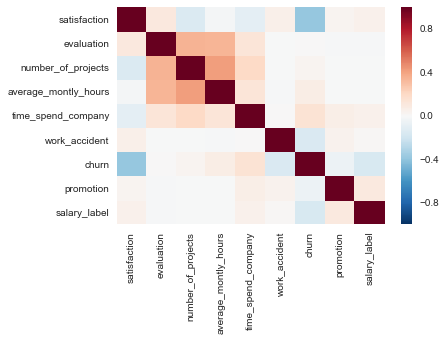

In [19]:
corr_matrix=data.corr() # create correlation matrix
sns.heatmap(corr_matrix)
plt.show()

*** Prepare feature and target variable ***
- Target [y]: churn
- feature [X]: everything else

In [55]:
X=data.drop('churn', axis=1) # Except churn rest all are features
y=data['churn'] # store only churn in target variable i.e. y

In [56]:
X.head(2)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1


In [57]:
y.head(2)

0    1
1    1
Name: churn, dtype: int64

*** Prepare training and test variable***
- train - the component used to develop the model
- test - the component used to validate the model

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25, random_state=2018)

In [63]:
# check the shape of training and test set
X_train.shape, X_test.shape

((11249, 18), (3750, 18))

Reference:
[Emplyoee Churn by Hrant Davtyan @ Datacamp](https://www.datacamp.com/courses/hr-analytics-in-python-predicting-employee-churn)